<a href="https://colab.research.google.com/github/stefvlad/MyAI/blob/main/project2_1sem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Perceptron, LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, \
  ConfusionMatrixDisplay, classification_report, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score, \
  precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay, roc_curve, auc

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [4]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home_dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [6]:
# Sumaryzacja

df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [7]:
# Sprawdzenie brakujących danych
missing_values = df.isnull().sum()

print(missing_values[missing_values > 0])

age           263
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home_dest     564
dtype: int64


In [8]:
df.drop('boat', axis='columns', inplace=True)
df.drop('body', axis='columns', inplace=True)
df.drop('home_dest', axis='columns', inplace=True)

df.drop('ticket', axis='columns', inplace=True)
df.drop('cabin', axis='columns', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   fare      1308 non-null   float64
 8   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 92.2+ KB


In [9]:
df['title'] = df['name'].str.split('[,.]').str[1].str.strip()
df['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [10]:
df.groupby(['sex', 'title'])['age'].aggregate(['count', 'mean', 'median']).dropna()

count       mean  median
sex    title                                 
female Dona              1  39.000000    39.0
       Dr                1  49.000000    49.0
       Lady              1  48.000000    48.0
       Miss            210  21.774207    22.0
       Mlle              2  24.000000    24.0
       Mme               1  24.000000    24.0
       Mrs             170  36.994118    35.5
       Ms                1  28.000000    28.0
       the Countess      1  33.000000    33.0
male   Capt              1  70.000000    70.0
       Col               4  54.000000    54.5
       Don               1  40.000000    40.0
       Dr                6  42.666667    47.0
       Jonkheer          1  38.000000    38.0
       Major             2  48.500000    48.5
       Master           53   5.482704     4.0
       Mr              581  32.252151    29.0
       Rev               8  41.250000    41.5
       Sir               1  49.000000    49.0

In [11]:
# Uzupełnienie wieku na podstawie określonych kryteriów


def impute_age(row):
    if pd.isnull(row['age']):
        if row['sex'] == 'female' and row['title'] == 'Miss' and row['parch'] == 0:
            return avg_age_miss_no_children
        elif row['sex'] == 'male' and row['title'] == 'Master':
            return avg_age_master
        elif row['title'] in ['Sir', 'Mr', 'Ms', 'Mrs']:
            return avg_age_mature
        elif row['title'] == 'Dr':
            return avg_age_dr
        elif row['sex'] == 'female':
            return avg_age_female
        elif row['sex'] == 'male':
            return avg_age_male
    else:
        return row['age']


avg_age_miss_no_children = df[(df['sex'] == 'female') & (df['title'] == 'Miss') & (df['parch'] == 0)]['age'].mean()
avg_age_master = df[(df['title'] == 'Master')]['age'].mean()
avg_age_mature = df[df['title'].isin(['Sir', 'Mr', 'Ms', 'Mrs'])]['age'].mean()
avg_age_dr = df[df['title'] == 'Dr']['age'].mean()
avg_age_female = df[df['sex'] == 'female']['age'].mean()
avg_age_male = df[df['sex'] == 'male']['age'].mean()


df['age'] = df.apply(impute_age, axis=1)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   fare      1308 non-null   float64
 8   embarked  1307 non-null   object 
 9   title     1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


In [13]:
# family_size
df['family_size'] = df['parch'] + df['sibsp'] + 1

# age_range
def categorize_age(age):
    if age <= 6:
        return 'Bobas'
    elif age <= 12:
        return 'Dzieciak'
    elif age <= 18:
        return 'Nastolatek'
    else:
        return 'Dorosły'

df['age_range'] = df['age'].apply(categorize_age)

# mpc
df['mpc'] = df['age'] * df['pclass']
df

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,title,family_size,age_range,mpc
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,211.3375,S,Miss,1,Dorosły,29.000000
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,151.5500,S,Master,4,Bobas,0.916700
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,151.5500,S,Miss,4,Bobas,2.000000
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,151.5500,S,Mr,4,Dorosły,30.000000
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,151.5500,S,Mrs,4,Dorosły,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,14.4542,C,Miss,2,Nastolatek,43.500000
1305,3,0,"Zabour, Miss. Thamine",female,27.216418,1,0,14.4542,C,Miss,2,Dorosły,81.649254
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,7.2250,C,Mr,1,Dorosły,79.500000
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,7.2250,C,Mr,1,Dorosły,81.000000


In [14]:
df[df['fare'].isna()]

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,title,family_size,age_range,mpc
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,NaN,S,Mr,1,Dorosły,181.5


In [15]:
# uzupełnienie brakujących danych w 'fare'

class_3  = df[df['pclass'] == 3]
class_3['fare'].mean()
mean_fare_class_3 = class_3['fare'].mean()
df.loc[df['pclass'] == 3, 'fare'] = df.loc[df['pclass'] == 3, 'fare'].fillna(mean_fare_class_3)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       1309 non-null   int64  
 1   survived     1309 non-null   int64  
 2   name         1309 non-null   object 
 3   sex          1309 non-null   object 
 4   age          1309 non-null   float64
 5   sibsp        1309 non-null   int64  
 6   parch        1309 non-null   int64  
 7   fare         1309 non-null   float64
 8   embarked     1307 non-null   object 
 9   title        1309 non-null   object 
 10  family_size  1309 non-null   int64  
 11  age_range    1309 non-null   object 
 12  mpc          1309 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


In [17]:
missing_values = df.isnull().sum()

print(missing_values[missing_values > 0])

embarked    2
dtype: int64


In [18]:
df.dropna(inplace=True)
missing_values = df.isnull().sum()

print(missing_values[missing_values > 0])

Series([], dtype: int64)


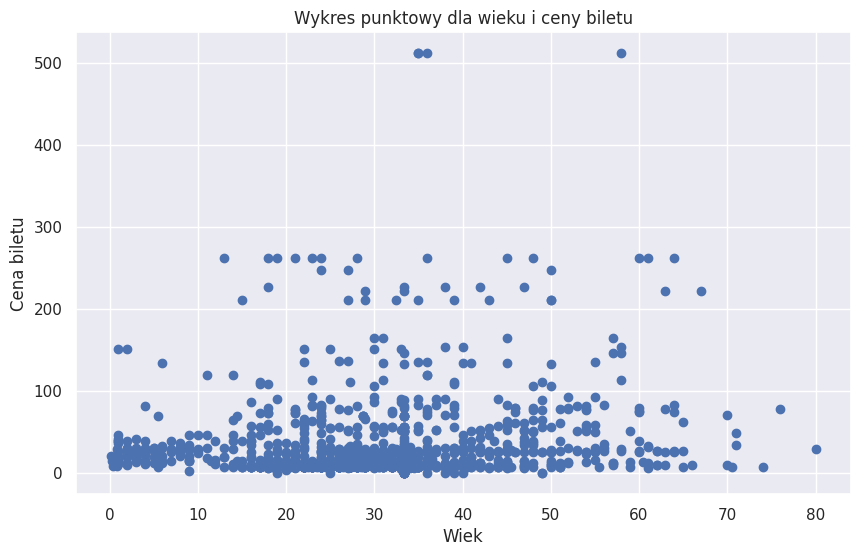

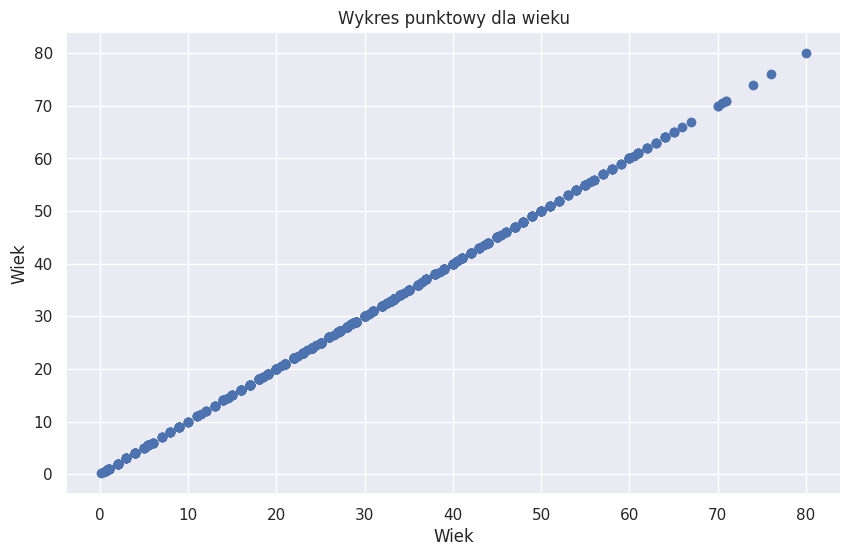

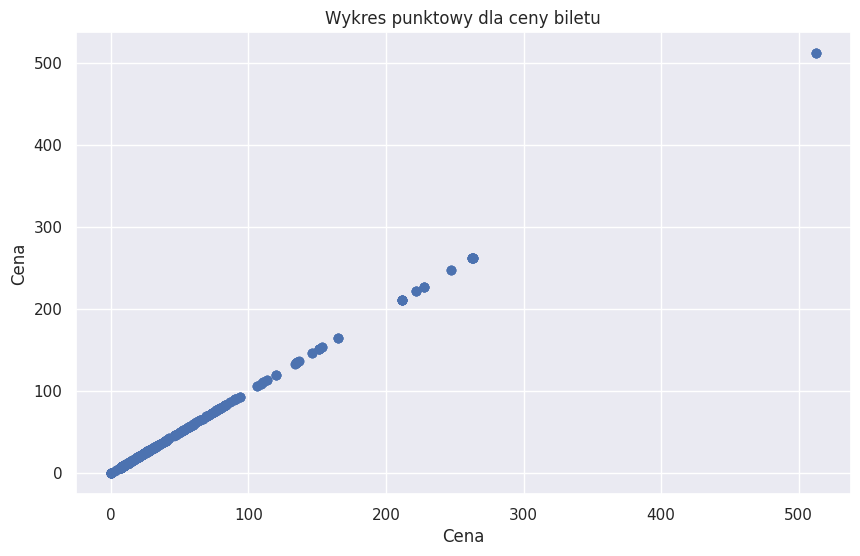

In [19]:
import matplotlib.pyplot as plt

# Wykres punktowy dla wieku i ceny biletu
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['fare'])
plt.title('Wykres punktowy dla wieku i ceny biletu')
plt.xlabel('Wiek')
plt.ylabel('Cena biletu')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['age'])
plt.title('Wykres punktowy dla wieku')
plt.xlabel('Wiek')
plt.ylabel('Wiek')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['fare'], df['fare'])
plt.title('Wykres punktowy dla ceny biletu')
plt.xlabel('Cena')
plt.ylabel('Cena')
plt.grid(True)
plt.show()

In [20]:
# Przycinanie odstających wartości dla wieku
df.loc[df['age'] > 67, 'age'] = df['age'].mean()

# Przycinanie odstających wartości dla ceny biletu
df.loc[df['fare'] > 300, 'fare'] = df['fare'].mean()


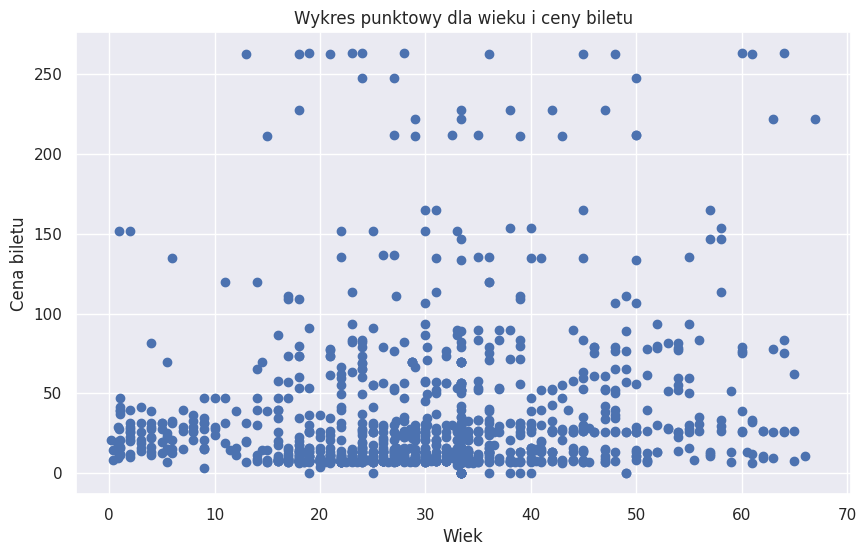

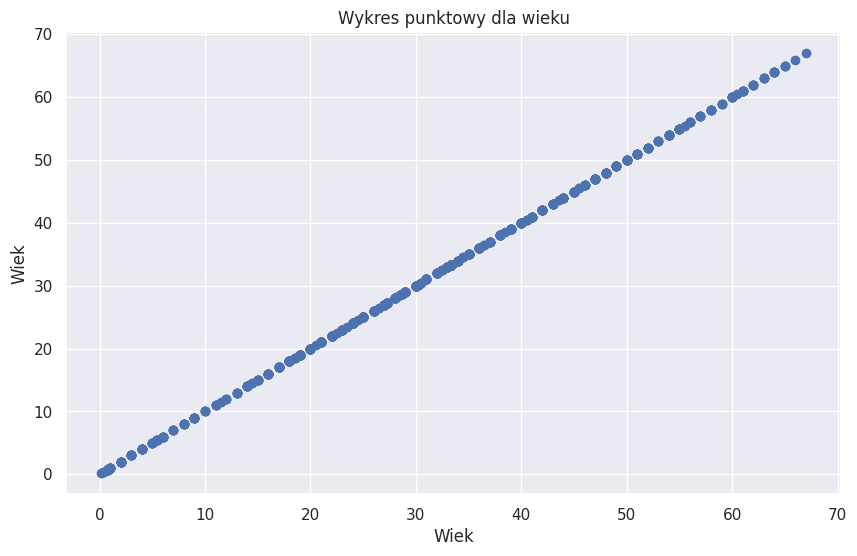

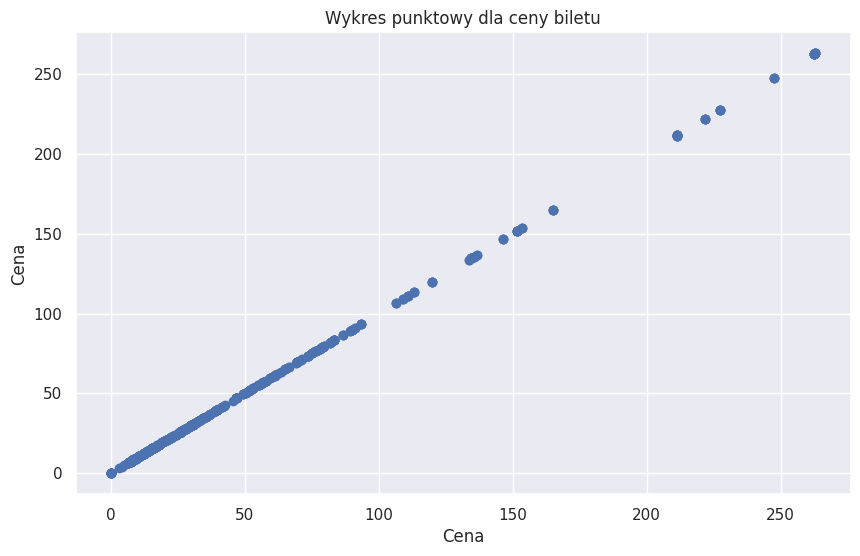

In [21]:
# Wykres punktowy dla wieku i ceny biletu
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['fare'])
plt.title('Wykres punktowy dla wieku i ceny biletu')
plt.xlabel('Wiek')
plt.ylabel('Cena biletu')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['age'])
plt.title('Wykres punktowy dla wieku')
plt.xlabel('Wiek')
plt.ylabel('Wiek')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['fare'], df['fare'])
plt.title('Wykres punktowy dla ceny biletu')
plt.xlabel('Cena')
plt.ylabel('Cena')
plt.grid(True)
plt.show()

In [22]:
df['survived'].unique()

array([1, 0])

In [23]:
df

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,title,family_size,age_range,mpc
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,211.3375,S,Miss,1,Dorosły,29.000000
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,151.5500,S,Master,4,Bobas,0.916700
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,151.5500,S,Miss,4,Bobas,2.000000
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,151.5500,S,Mr,4,Dorosły,30.000000
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,151.5500,S,Mrs,4,Dorosły,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,14.4542,C,Miss,2,Nastolatek,43.500000
1305,3,0,"Zabour, Miss. Thamine",female,27.216418,1,0,14.4542,C,Miss,2,Dorosły,81.649254
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,7.2250,C,Mr,1,Dorosły,79.500000
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,7.2250,C,Mr,1,Dorosły,81.000000


In [24]:
df.drop('name', axis='columns', inplace=True)

In [25]:
df

,pclass,survived,sex,age,sibsp,parch,fare,embarked,title,family_size,age_range,mpc
0,1,1,female,29.000000,0,0,211.3375,S,Miss,1,Dorosły,29.000000
1,1,1,male,0.916700,1,2,151.5500,S,Master,4,Bobas,0.916700
2,1,0,female,2.000000,1,2,151.5500,S,Miss,4,Bobas,2.000000
3,1,0,male,30.000000,1,2,151.5500,S,Mr,4,Dorosły,30.000000
4,1,0,female,25.000000,1,2,151.5500,S,Mrs,4,Dorosły,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.500000,1,0,14.4542,C,Miss,2,Nastolatek,43.500000
1305,3,0,female,27.216418,1,0,14.4542,C,Miss,2,Dorosły,81.649254
1306,3,0,male,26.500000,0,0,7.2250,C,Mr,1,Dorosły,79.500000
1307,3,0,male,27.000000,0,0,7.2250,C,Mr,1,Dorosły,81.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       1307 non-null   int64  
 1   survived     1307 non-null   int64  
 2   sex          1307 non-null   object 
 3   age          1307 non-null   float64
 4   sibsp        1307 non-null   int64  
 5   parch        1307 non-null   int64  
 6   fare         1307 non-null   float64
 7   embarked     1307 non-null   object 
 8   title        1307 non-null   object 
 9   family_size  1307 non-null   int64  
 10  age_range    1307 non-null   object 
 11  mpc          1307 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 132.7+ KB


In [27]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['sex'].unique()

array([0, 1])

In [28]:
df['embarked'] = le.fit_transform(df['embarked'])
df['embarked'].unique()

array([2, 0, 1])

In [29]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df['age_range'] = ordinal_encoder.fit_transform(df[['age_range']])
df['age_range'].unique()

array([1., 0., 3., 2.])

In [30]:
df['title'] = df['title'].map({'Miss':0, 'Mlle':0, 'Master':1, 'Mrs':2, 'Mme':2, 'Mr':3, 'Dr':3, 'Lady':4, 'Sir':5,
                                 'Don':5, 'Jonkheer':5, 'Rev':6, 'Major':7, 'Col':8, 'Capt':9}).fillna(10).astype('uint8')
df['title'].unique()

array([ 0,  1,  3,  2,  8,  7,  9,  4,  5, 10,  6], dtype=uint8)

In [31]:
df

,pclass,survived,sex,age,sibsp,parch,fare,embarked,title,family_size,age_range,mpc
0,1,1,0,29.000000,0,0,211.3375,2,0,1,1.0,29.000000
1,1,1,1,0.916700,1,2,151.5500,2,1,4,0.0,0.916700
2,1,0,0,2.000000,1,2,151.5500,2,0,4,0.0,2.000000
3,1,0,1,30.000000,1,2,151.5500,2,3,4,1.0,30.000000
4,1,0,0,25.000000,1,2,151.5500,2,2,4,1.0,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,0,14.500000,1,0,14.4542,0,0,2,3.0,43.500000
1305,3,0,0,27.216418,1,0,14.4542,0,0,2,1.0,81.649254
1306,3,0,1,26.500000,0,0,7.2250,0,3,1,1.0,79.500000
1307,3,0,1,27.000000,0,0,7.2250,0,3,1,1.0,81.000000


In [32]:
# Użyłem do zbalansowania zbioru
from imblearn.over_sampling import SMOTE

X_S = df.drop('survived', axis=1)
y_S = df['survived']

smote = SMOTE(random_state=42)
df, y = smote.fit_resample(X_S, y_S)

In [33]:
df

,pclass,sex,age,sibsp,parch,fare,embarked,title,family_size,age_range,mpc
0,1,0,29.000000,0,0,211.337500,2,0,1,1.0,29.000000
1,1,1,0.916700,1,2,151.550000,2,1,4,0.0,0.916700
2,1,0,2.000000,1,2,151.550000,2,0,4,0.0,2.000000
3,1,1,30.000000,1,2,151.550000,2,3,4,1.0,30.000000
4,1,0,25.000000,1,2,151.550000,2,2,4,1.0,25.000000
...,...,...,...,...,...,...,...,...,...,...,...
1613,3,0,23.000000,0,0,7.922845,2,0,1,1.0,69.000000
1614,3,0,19.000000,0,0,7.949242,1,1,1,1.0,57.000000
1615,3,0,17.392244,0,1,13.452353,2,0,2,3.0,52.176732
1616,1,0,33.339309,0,0,53.235078,2,2,2,1.0,33.339309


In [34]:
y

0       1
1       1
2       0
3       0
4       0
       ..
1613    1
1614    1
1615    1
1616    1
1617    1
Name: survived, Length: 1618, dtype: int64

In [65]:
# Liczba survived

y_series = pd.Series(y)

counts = y_series.value_counts()

print(counts)

1    809
0    809
Name: survived, dtype: int64


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       1618 non-null   int64  
 1   sex          1618 non-null   int64  
 2   age          1618 non-null   float64
 3   sibsp        1618 non-null   int64  
 4   parch        1618 non-null   int64  
 5   fare         1618 non-null   float64
 6   embarked     1618 non-null   int64  
 7   title        1618 non-null   uint8  
 8   family_size  1618 non-null   int64  
 9   age_range    1618 non-null   float64
 10  mpc          1618 non-null   float64
dtypes: float64(4), int64(6), uint8(1)
memory usage: 128.1 KB


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

columns_to_normalize = ['age', 'fare', 'sibsp', 'parch', 'family_size', 'mpc']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

df

,pclass,sex,age,sibsp,parch,fare,embarked,title,family_size,age_range,mpc
0,1,0,0.431421,0.000,0.000000,0.803565,2,0,0.0,1.0,0.128668
1,1,1,0.011222,0.125,0.222222,0.576236,2,1,0.3,0.0,0.001881
2,1,0,0.027431,0.125,0.222222,0.576236,2,0,0.3,0.0,0.006772
3,1,1,0.446384,0.125,0.222222,0.576236,2,3,0.3,1.0,0.133182
4,1,0,0.371571,0.125,0.222222,0.576236,2,2,0.3,1.0,0.110609
...,...,...,...,...,...,...,...,...,...,...,...
1613,3,0,0.341646,0.000,0.000000,0.030125,2,0,0.0,1.0,0.309255
1614,3,0,0.281795,0.000,0.000000,0.030225,1,1,0.0,1.0,0.255079
1615,3,0,0.257739,0.000,0.111111,0.051150,2,0,0.1,3.0,0.233303
1616,1,0,0.496349,0.000,0.000000,0.202415,2,2,0.1,1.0,0.148258


In [38]:
df.drop('title', axis='columns', inplace=True)
df.drop('sibsp', axis='columns', inplace=True)
df.drop('parch', axis='columns', inplace=True)

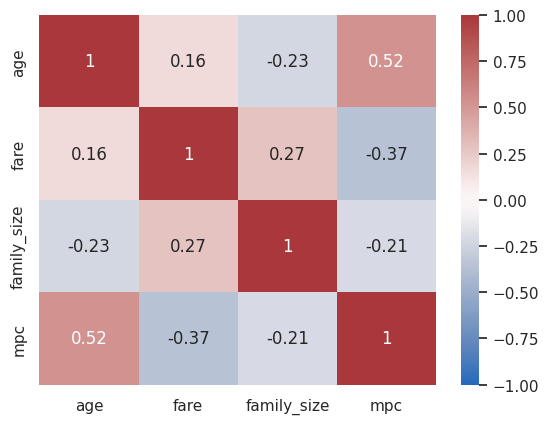

In [62]:
import seaborn as sns
sns.set()

selected_columns = ['age', 'fare', 'family_size', 'mpc']

# Wybór tylko wybranych kolumn
selected_data = df[selected_columns]

# Generowanie heatmapy korelacji
plt.figure()
corr = selected_data.corr()
sns.heatmap(corr, annot=True, cmap='vlag', vmin=-1, vmax=1)
plt.show()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=10)
scaler = StandardScaler()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1294, 8), (324, 8), (1294,), (324,))

In [41]:
###################################################################################################################

In [42]:
perceptron_model = Perceptron(eta0=0.1, random_state=2)
perceptron_model.fit(X_train, y_train)
print(perceptron_model.n_iter_)

8


In [43]:
predictions_train = perceptron_model.predict(X_train)
predictions_test = perceptron_model.predict(X_test)

In [44]:
accuracy_t = accuracy_score(y_train, predictions_train)
accuracy = accuracy_score(y_test, predictions_test)
accuracy_t, accuracy

(0.8021638330757341, 0.8024691358024691)

In [45]:
###################################################################################################################

In [46]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
print(mlp_model.n_iter_)

predictions_train = mlp_model.predict(X_train)
predictions_test = mlp_model.predict(X_test)

accuracy_t = accuracy_score(y_train, predictions_train)
accuracy = accuracy_score(y_test, predictions_test)
accuracy_t, accuracy

381


(0.8276661514683153, 0.808641975308642)

In [47]:
###################################################################################################################

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty=None)
lr.fit(X_train, y_train)

LogisticRegression(penalty=None)

In [49]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.8052550231839258, 0.8148148148148148)

In [50]:
###################################################################################################################

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [52]:
predictions_train = clf.predict(X_train)
predictions_test = clf.predict(X_test)

accuracy_t = accuracy_score(y_train, predictions_train)
accuracy = accuracy_score(y_test, predictions_test)
accuracy_t, accuracy

(0.9760432766615147, 0.8333333333333334)

In [53]:
###################################################################################################################

In [54]:
from sklearn.neighbors import KNeighborsClassifier

train_accuracies = []
test_accuracies = []

neighbors = range(1, 30)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    predictions_train = knn.predict(X_train)
    predictions_test = knn.predict(X_test)

    accuracy_t = accuracy_score(y_train, predictions_train)
    accuracy = accuracy_score(y_test, predictions_test)

    train_accuracies.append(accuracy_t)
    test_accuracies.append(accuracy)

    if accuracy_t >= 0.8 and accuracy >= 0.8:
      neighbors = range(1, k+1)
      break



accuracy_t, accuracy

(0.8871715610510046, 0.8055555555555556)

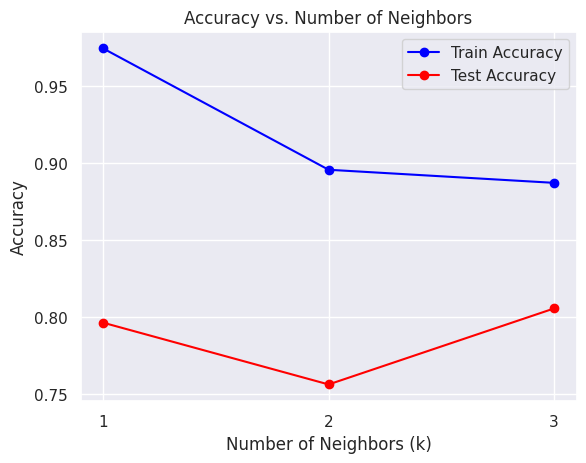

In [55]:
plt.figure()
plt.plot(neighbors, train_accuracies, marker='o', linestyle='-', color='blue', label='Train Accuracy')
plt.plot(neighbors, test_accuracies, marker='o', linestyle='-', color='red', label='Test Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.show()

In [56]:
cm_train = confusion_matrix(y_train, predictions_train)
cm_test = confusion_matrix(y_test, predictions_test)
cm_test, cm_train

(array([[126,  28],
        [ 35, 135]]),
 array([[586,  69],
        [ 77, 562]]))

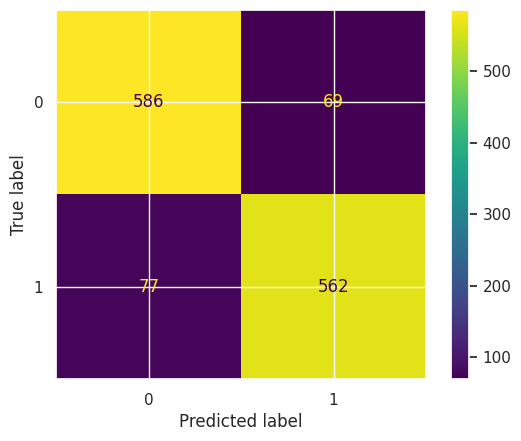

In [57]:
ConfusionMatrixDisplay(cm_train).plot()

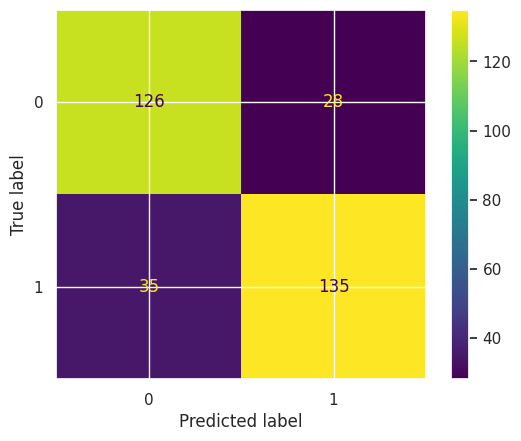

In [58]:
ConfusionMatrixDisplay(cm_test).plot()

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

predictions_train = knn.predict(X_train)
predictions_test = knn.predict(X_test)

accuracy_train = accuracy_score(y_train, predictions_train)
accuracy_test = accuracy_score(y_test, predictions_test)
precision = precision_score(y_test, predictions_test)
recall = recall_score(y_test, predictions_test)
f1 = f1_score(y_test, predictions_test)
roc_auc = roc_auc_score(y_test, predictions_test)

print(f"Accuracy Train: {accuracy_train}")
print(f"Accuracy Test: {accuracy_test}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

fpr, tpr, thresholds = roc_curve(y_test, predictions_test)
roc_auc = auc(fpr, tpr)

Accuracy Train: 0.8871715610510046
Accuracy Test: 0.8055555555555556
Precision: 0.8282208588957055
Recall: 0.7941176470588235
F1 Score: 0.8108108108108107
ROC AUC Score: 0.8061497326203207


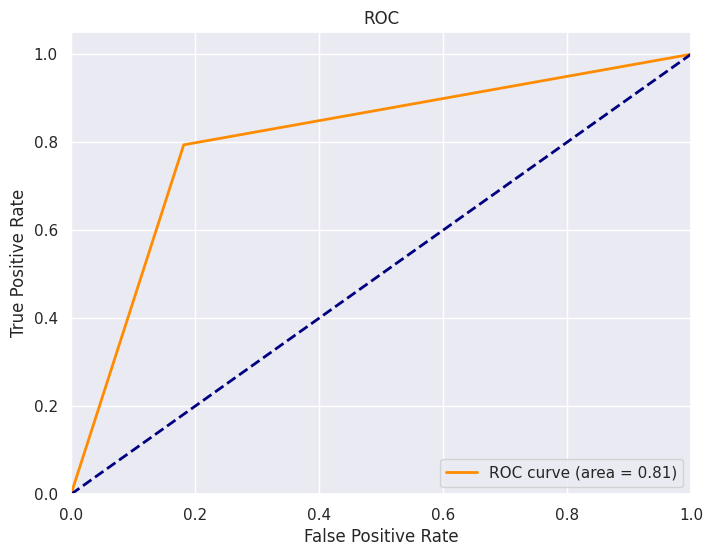

In [60]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

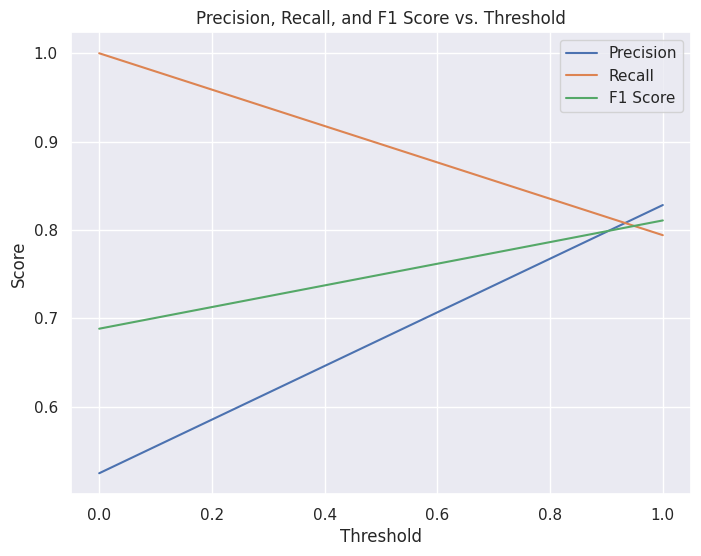

In [61]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, predictions_test)
f1 = 2 * (precision * recall) / (precision + recall)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, f1[:-1], label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()
